# Phys-A0110 Yliopistofysiikan perusteet (TFM)
## Luentoesimerkki
## Putoava kartio neliöllisellä vastusvoimalla

In [4]:
%matplotlib inline
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML

plt.rcParams['text.usetex'] = True


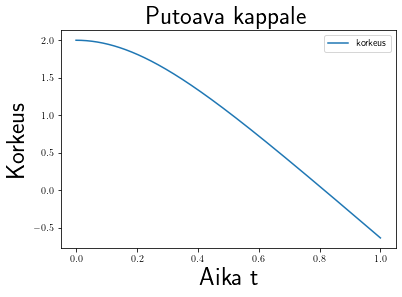

In [7]:
#parametrien arvot

halkaisija = 0.1 # kartionn halkaisija [m]
pintaala = np.pi*halkaisija*halkaisija/4 # kartion poikkipinta-ala [m^2]
muotovakio = 0.5 # kartiolle, dimensioton
ilmantiheys = 1.225 # NTP arvo, [kg/m^3]
massa = 0.003 # kartion massa [kg]
g = 9.81 # putoamiskiihtyvyys [m/s^2]

#alkuehdot

y0 = 2 # pudotuskorkeus [m]
v0 = 0 # alkunopeus [m/s]

x0 = [y0,v0] # muodostetaan alkuehdoista vektori    

# muuttujan alustus

t = np.linspace(0,1,1000) # määritellään aikahaarukka [0:1] [s] ja tarkkuus (1000 pistettä) jolla yhtälöparia ratkotaan

#määritellään differentiaaliyhtälö

def liikeyhtalo(x,t):    
    y = x[0]  ## korkeus
    v = x[1]  ## nopeus
    
#liikeyhtälö dx/dt = v, dv/dt = -mg - 0.5*C*A*rho*v^2
    dxdt = v # korkeuden aikaderivaatta = nopeus
    if v > 0:
        dvdt = (-massa*g - 0.5*muotovakio*pintaala*ilmantiheys*v*v)/massa
    else:
        dvdt = (-massa*g + 0.5*muotovakio*pintaala*ilmantiheys*v*v)/massa
        
    return [dxdt,dvdt] 

#ratkaistaan differentiaaliyhtälöpari. Tällä rivillä siis ratkaistaan numeerisesti koko ongelma.

x = odeint(liikeyhtalo,x0,t)

ys = x[:,0] # poimitaan ratkaisusta korkeudet y(t)
vs = x[:,1] # poimitaan ratkaisusta nopeudet v(t)

# piirretään ratkaisut

plt.plot(t,ys,label="korkeus")
plt.title("Putoava kappale",fontsize=25)
plt.xlabel(r"Aika t",fontsize=25)
plt.ylabel(r"Korkeus",fontsize=25)
plt.legend(loc="upper right")
plt.show()

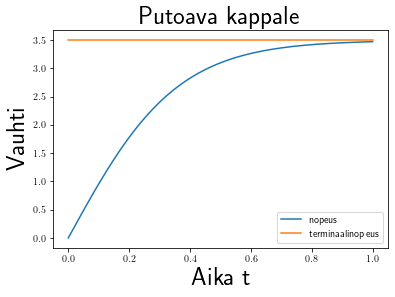

In [8]:
plt.plot(t,-vs,label="nopeus")
plt.title("Putoava kappale",fontsize=25)
plt.xlabel(r"Aika t",fontsize=25)
plt.ylabel(r"Vauhti",fontsize=25)

terminaalinopeus = np.ones(t.size)*np.sqrt(2*massa*g/(muotovakio*pintaala*ilmantiheys))
plt.plot(t,terminaalinopeus, label ="terminaalinopeus")

plt.legend(loc="lower right")
plt.show()